In [4]:
# Decision Tree: Classification

## Importing libraries

In [5]:
# Preprocessing data packages
import pandas as pd
import numpy as np

# Graphics packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import *

# Modeling packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from scipy import stats

# Exploratory Analysis Module
import aed

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover_EN\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing database

In [6]:
df = pd.read_csv('hr_base.csv',sep=',')
df.head()

,Employee_Left_Company,Travel_Frequency,Education,Marital_Status,Does_Overtime,Work_Life_Balance,Age,Years_at_Company
0,Yes,Travels rarely,Technical Education,Single,Yes,Poor,41,6
1,No,Travels frequently,High School,Married,No,Very good,49,10
2,Yes,Travels rarely,Technical Education,Single,Yes,Very good,37,0
3,No,Travels frequently,Master's Degree,Married,Yes,Very good,33,8
4,No,Travels rarely,High School,Married,No,Very good,27,2


## Preparing Data

### Missing Values

In [7]:
df.isnull().sum()

Employee_Left_Company    0
Travel_Frequency         0
Education                0
Marital_Status           0
Does_Overtime            0
Work_Life_Balance        0
Age                      0
Years_at_Company         0
dtype: int64

### Duplications

In [8]:
df.index.duplicated().sum()

0

### Variables types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_Left_Company  1470 non-null   object
 1   Travel_Frequency       1470 non-null   object
 2   Education              1470 non-null   object
 3   Marital_Status         1470 non-null   object
 4   Does_Overtime          1470 non-null   object
 5   Work_Life_Balance      1470 non-null   object
 6   Age                    1470 non-null   int64 
 7   Years_at_Company       1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


## Exploratory Data Analysis

### Dispersion by Class

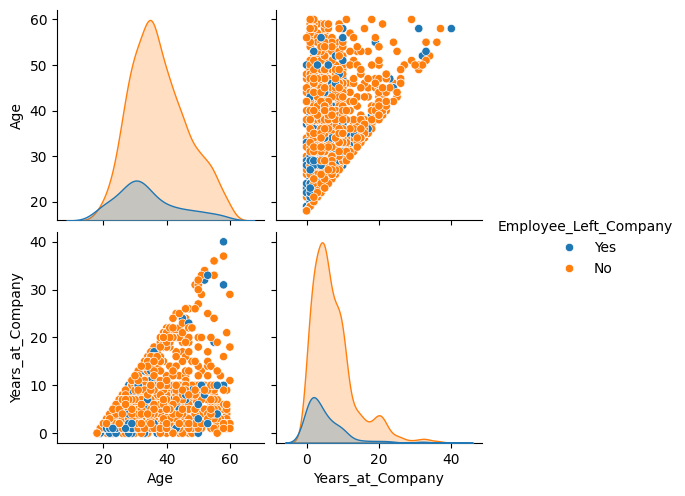

In [10]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='Employee_Left_Company');

### Information Value - IV

In [11]:
df['Target'] = np.where(df['Employee_Left_Company'] == 'Yes', 1, 0)

df_iv = aed.analysis_iv(df, 
                          'Target')
df_iv.get_list_iv()

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover_EN\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


Target,IV
Variavel,
Employee_Left_Company,9.21
Does_Overtime,0.40
Years_at_Company,0.34
Age,0.31
Marital_Status,0.22
Travel_Frequency,0.13
Work_Life_Balance,0.06
Education,0.01


In [12]:
df_iv.get_bivariate(var_chosen='Does_Overtime')

==> "Does_Overtime" tem IV de 0.4


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Does_Overtime,No,110.0,944.0,1054.0,71.7,46.41,76.56,10.44,0.61,-0.49,0.15
1,Does_Overtime,Yes,127.0,289.0,416.0,28.3,53.59,23.44,30.53,2.29,0.83,0.25


A proporção de pessoas que saíram da empresa e fazem hora extra é de 2.29, enquanto a proporção de pessoas
que saíram da empresa e não fizeram hora extra é de 0.61.

In [13]:
df_iv.get_bivariate(var_chosen='Years_at_Company')

==> "Years_at_Company" tem IV de 0.34


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Years_at_Company,"(-0.01, 1.0]",75.0,140.0,215.0,14.63,31.65,11.35,34.88,2.79,1.03,0.21
1,Years_at_Company,"(1.0, 2.0]",27.0,100.0,127.0,8.64,11.39,8.11,21.26,1.40,0.34,0.01
2,Years_at_Company,"(2.0, 3.0]",20.0,108.0,128.0,8.71,8.44,8.76,15.62,0.96,-0.04,0.00
3,Years_at_Company,"(3.0, 5.0]",40.0,266.0,306.0,20.82,16.88,21.57,13.07,0.78,-0.25,0.01
4,Years_at_Company,"(5.0, 7.0]",20.0,146.0,166.0,11.29,8.44,11.84,12.05,0.71,-0.34,0.01
5,Years_at_Company,"(7.0, 9.0]",17.0,145.0,162.0,11.02,7.17,11.76,10.49,0.61,-0.49,0.02
6,Years_at_Company,"(9.0, 10.0]",18.0,102.0,120.0,8.16,7.59,8.27,15.00,0.92,-0.08,0.00
7,Years_at_Company,"(10.0, 15.0]",7.0,101.0,108.0,7.35,2.95,8.19,6.48,0.36,-1.02,0.05
8,Years_at_Company,"(15.0, 40.0]",13.0,125.0,138.0,9.39,5.49,10.14,9.42,0.54,-0.62,0.03


==> "Tempo_de_empresa" tem IV de 0.34

### Pandas Profiling and SweetViz Reports

In [14]:
perfil_pp, perfil_sv = aed.make_reports_aed(df=df,
                                               target_feat='Target')

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover_EN\venv\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 165.57it/s]
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Model Development: Decision Tree


### Definition of *Target* and *Features*

In [15]:
# Dummies variables
df_model = pd.get_dummies(df)
df_model = df_model.astype(int)
df_model.head()

,Age,Years_at_Company,Target,Employee_Left_Company_No,Employee_Left_Company_Yes,Travel_Frequency_Does not travel,Travel_Frequency_Travels frequently,Travel_Frequency_Travels rarely,Education_Bachelor’s Degree,Education_High School,...,Education_Technical Education,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Does_Overtime_No,Does_Overtime_Yes,Work_Life_Balance_Excellent,Work_Life_Balance_Good,Work_Life_Balance_Poor,Work_Life_Balance_Very good
0,41,6,1,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,49,10,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,37,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
3,33,8,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,27,2,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [16]:
# Target 
y = df_model['Target']

# Features 
x = df_model.drop(['Target',
                       'Employee_Left_Company_No',
                       'Employee_Left_Company_Yes'
                      ], 
                      axis = 1)

### Decision Tree Training

In [17]:
model_turnover = DecisionTreeClassifier(max_depth=3, 
                                         random_state=42)
model_turnover.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Trained model evaluation

#### Model Interpretation

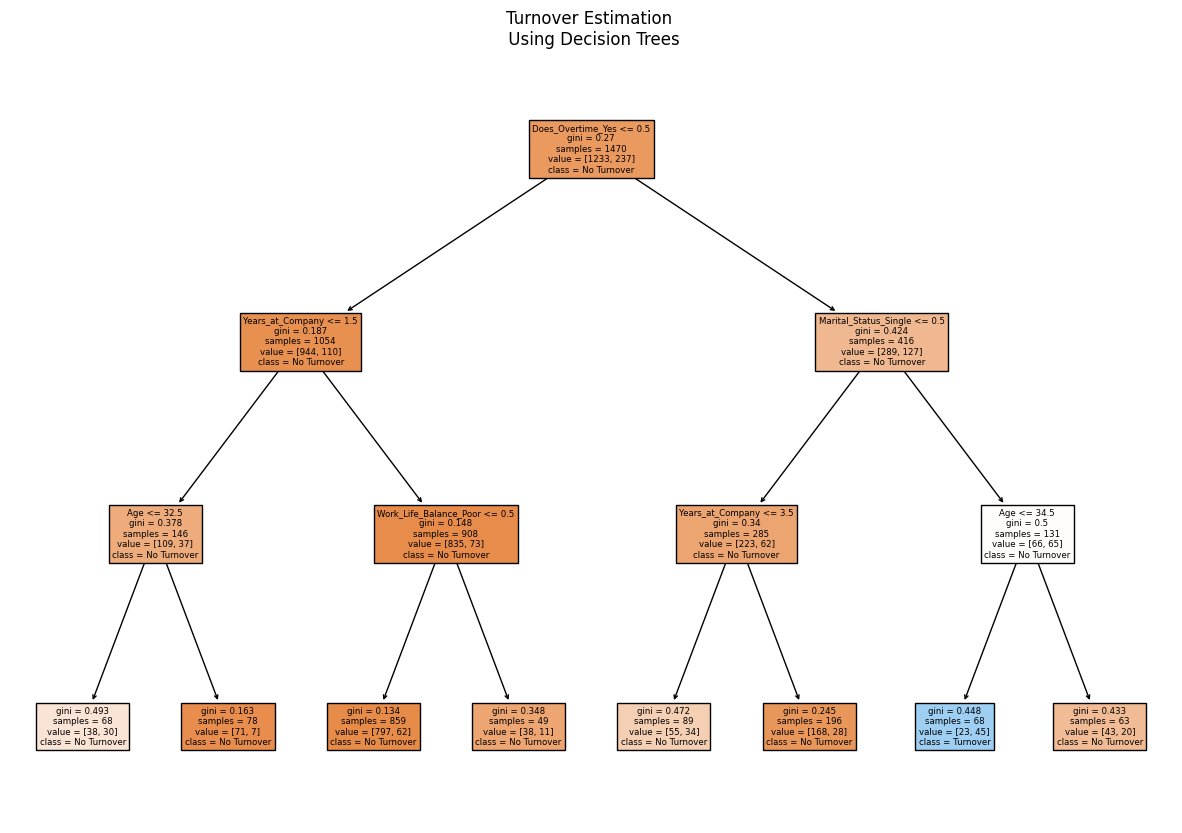

In [18]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(model_turnover,                             # model
               feature_names=features,                      # feature
               class_names=['No Turnover','Turnover'],     # class
               filled=True);                                # colors on boxes
plt.title("Turnover Estimation \n Using Decision Trees");

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover_EN\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


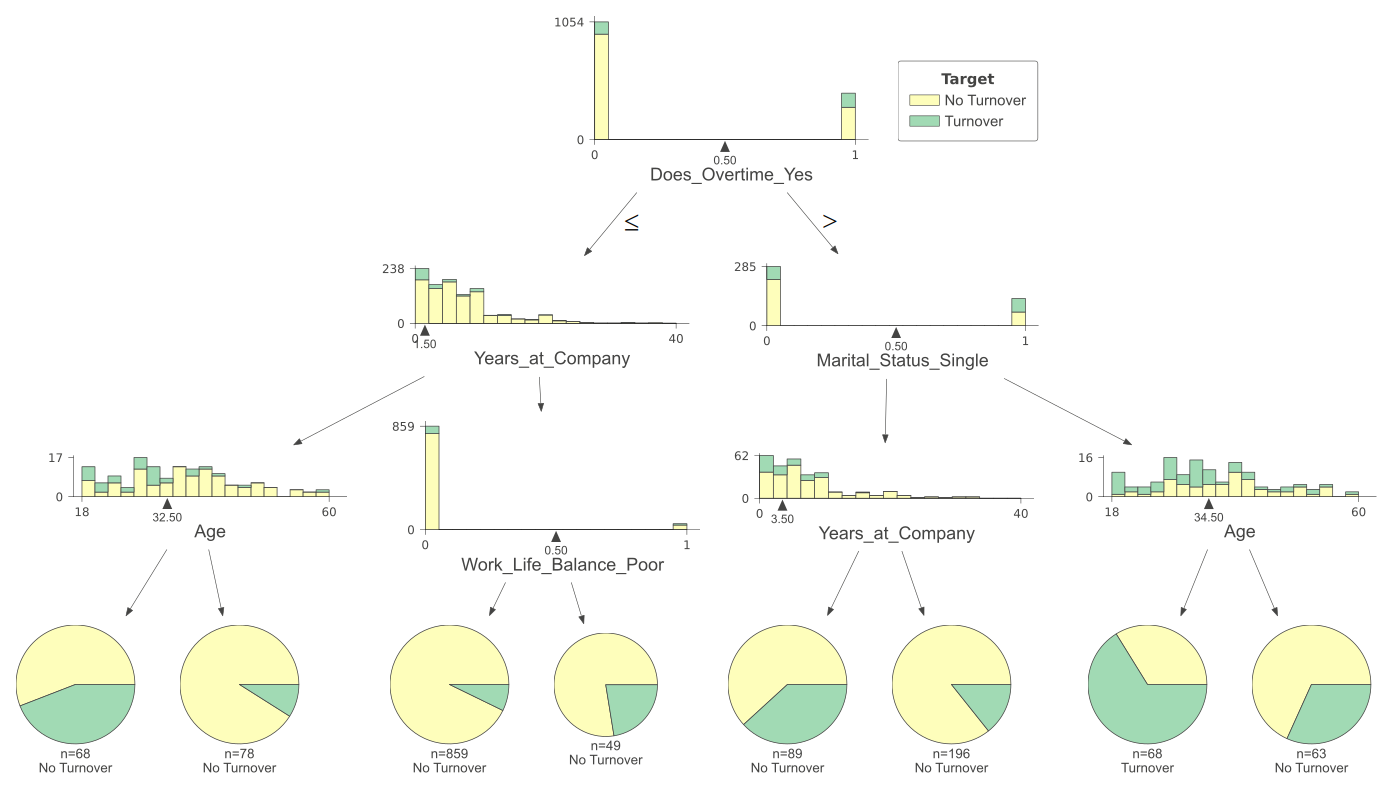

In [32]:
viz = dtreeviz(tree_model=model_turnover,
               x_data=x, y_data=y, 
               target_name='Target',
               feature_names=features,
               class_names=['No Turnover', 'Turnover'], 
               scale=2.0)
viz

#### Model Performance

In [20]:
# Separating x and y into training and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
# Creating and training model with the same hyperparameters
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
# Making predictions and calculating probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade de y = 1

In [23]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[357,  23],
       [ 48,  13]], dtype=int64)

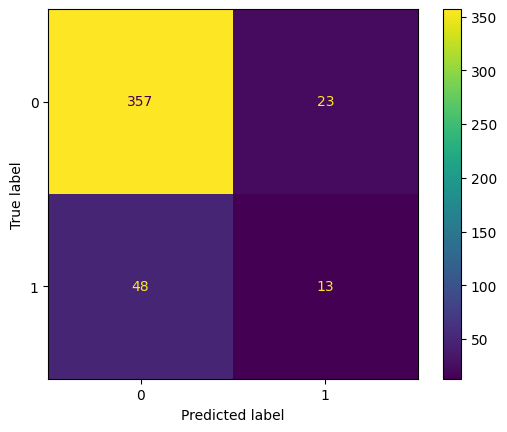

In [24]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

the model performs well in class 0 (as you can see from the high recall and precision of 0), but is having trouble predicting class 1.

In [25]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       380
           1       0.36      0.21      0.27        61

    accuracy                           0.84       441
   macro avg       0.62      0.58      0.59       441
weighted avg       0.81      0.84      0.82       441



The precision of 0.36 and recall of 0.21 for class 1 indicate that the model has difficulty correctly predicting the positive class (class 1). This is a sign that the model may have a class bias (more focused on predicting class 0, since the class distribution is not balanced).

 The f1-score for class 1 is low, which reinforces the idea that class 1 is not being classified well.
 The accuracy is good (84%), but accuracy alone can be misleading, especially with unbalanced data.

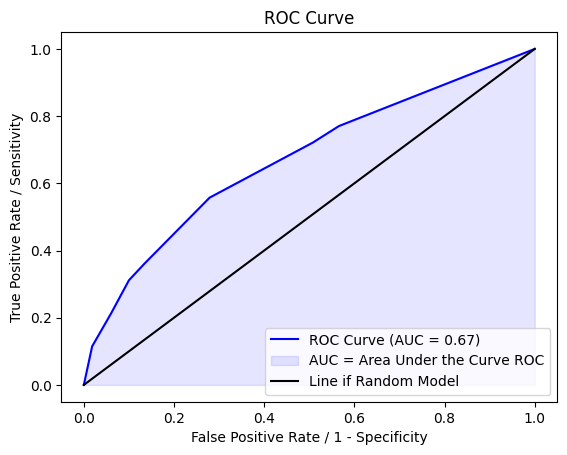

In [31]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Area Under the Curve ROC')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Line if Random Model')
plt.xlabel('False Positive Rate / 1 - Specificity')
plt.ylabel('True Positive Rate / Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

the model can distinguish reasonably well between the two classes, but it can still be improved.

In [27]:
ks_data = pd.DataFrame({
    'y_test': y_test,
    'y_prob': y_prob
})

In [28]:
# Separating the probabilities according to the real value of y_test
prob_y_real_0 = ks_data.loc[ks_data['y_test'] == 0, 'y_prob']
prob_y_real_1 = ks_data.loc[ks_data['y_test'] == 1, 'y_prob']

In [29]:
from scipy.stats import ks_2samp

# Calculating KS
ks_stat, ks_p_value = ks_2samp(prob_y_real_1, prob_y_real_0)

print(f"KS Statistic: {ks_stat:.4f}")
print(f"p-value: {ks_p_value:.4f}")

KS Statistic: 0.2784
p-value: 0.0004


The 28% value for KS suggests that the model has a reasonable difference between classes in terms of distribution, but there is room for improvement.